<a href="https://colab.research.google.com/github/Sarvesh1814/HateXplain/blob/main/LSTM_Glove.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gensim
import spacy
import nltk
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from gensim.models import Word2Vec
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout
import tensorflow as tf
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Reproducibility/Sample Model/HateXplain2.csv")

In [ ]:
df = df[['post_tokens',	'Target_cat',	'Label_cat',	'final_rationales']]
df['post_tokens'] = df['post_tokens'].apply(lambda x: eval(x))
df.head()

,post_tokens,Target_cat,Label_cat,final_rationales
0,"[i, dont, think, im, getting, my, baby, them, ...",None,normal,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[we, cannot, continue, calling, ourselves, fem...",None,normal,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[nawt, yall, niggers, ignoring, me]",African,normal,"[0, 0, 0, 0, 0]"
3,"[<user>, i, am, bit, confused, coz, chinese, p...",Asian,hatespeech,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[this, bitch, in, whataburger, eating, a, burg...",Women,hatespeech,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
df['tweet']=''
for i in range(len(df)):
  df['tweet'].iloc[i] = " ".join(df["post_tokens"].iloc[i])

In [ ]:
df

,post_tokens,Target_cat,Label_cat,final_rationales,tweet
0,"[i, dont, think, im, getting, my, baby, them, ...",None,normal,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",i dont think im getting my baby them white 9 h...
1,"[we, cannot, continue, calling, ourselves, fem...",None,normal,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",we cannot continue calling ourselves feminists...
2,"[nawt, yall, niggers, ignoring, me]",African,normal,"[0, 0, 0, 0, 0]",nawt yall niggers ignoring me
3,"[<user>, i, am, bit, confused, coz, chinese, p...",Asian,hatespeech,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",<user> i am bit confused coz chinese ppl can n...
4,"[this, bitch, in, whataburger, eating, a, burg...",Women,hatespeech,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",this bitch in whataburger eating a burger with...
...,...,...,...,...,...
20143,"[if, ur, still, on, twitter, tell, carlton, i,...",None,offensive,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, ...",if ur still on twitter tell carlton i said his...
20144,"[when, i, first, got, on, here, and, said, i, ...",African,offensive,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, ...",when i first got on here and said i hate trump...
20145,"[was, macht, der, moslem, wenn, der, zion, geg...",Other,normal,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",was macht der moslem wenn der zion gegen seine...
20146,"[it, is, awful, look, at, world, demographics,...",Asian,hatespeech,"[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, ...",it is awful look at world demographics asians ...


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, Input, GlobalMaxPooling1D, Concatenate, Dot
from tensorflow.keras.models import Model
from gensim.models import Word2Vec
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import gensim.downloader as api

In [ ]:
model_name = 'glove-wiki-gigaword-300'
w2v_model = api.load(model_name)

[=================================================-] 99.1% 372.7/376.1MB downloaded


In [ ]:
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['tweet'])

In [ ]:
sequences = tokenizer.texts_to_sequences(df['tweet'])
padded_sequences = pad_sequences(sequences, maxlen=50, padding='post', truncating='post')

In [ ]:
Label_encoder = LabelEncoder()
Label_labels = Label_encoder.fit_transform(df['Label_cat'])
y1 = tf.keras.utils.to_categorical(Label_labels, num_classes=3)

In [ ]:
embedding_dim = 300
num_words = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.key_to_index.keys():
        embedding_matrix[i] = w2v_model[word]

# Define the model architecture
input_layer = Input(shape=(50,))
embedding_layer = Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix], trainable=False)(input_layer)
lstm_layer = LSTM(128, return_sequences=True)(embedding_layer)
lstm_layer = Dropout(0.5)(lstm_layer)
lstm_layer = LSTM(64)(lstm_layer)
lstm_layer = Dropout(0.5)(lstm_layer)
output_layer = Dense(3, activation='softmax')(lstm_layer)

model = Model(inputs=[input_layer], outputs=output_layer)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(padded_sequences, y1, batch_size=32, epochs=20, validation_split=0.2)


Epoch 1/20
504/504 [==============================] - 10s 11ms/step - loss: 0.9338 - accuracy: 0.5565 - val_loss: 1.0686 - val_accuracy: 0.4045
Epoch 2/20
504/504 [==============================] - 5s 10ms/step - loss: 0.8431 - accuracy: 0.6133 - val_loss: 1.0499 - val_accuracy: 0.4385
Epoch 3/20
504/504 [==============================] - 4s 9ms/step - loss: 0.7988 - accuracy: 0.6500 - val_loss: 1.0057 - val_accuracy: 0.5087
Epoch 4/20
504/504 [==============================] - 4s 9ms/step - loss: 0.7589 - accuracy: 0.6691 - val_loss: 0.9863 - val_accuracy: 0.5166
Epoch 5/20
504/504 [==============================] - 5s 10ms/step - loss: 0.7205 - accuracy: 0.6897 - val_loss: 1.0257 - val_accuracy: 0.5040
Epoch 6/20
504/504 [==============================] - 4s 8ms/step - loss: 0.6806 - accuracy: 0.7216 - val_loss: 1.0670 - val_accuracy: 0.4878
Epoch 7/20
504/504 [==============================] - 4s 9ms/step - loss: 0.6460 - accuracy: 0.7382 - val_loss: 1.0183 - val_accuracy: 0.5206
Ep

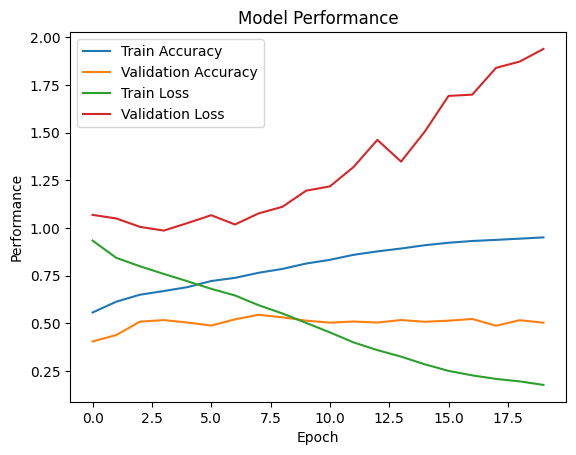

In [ ]:
# Plot the history of accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Performance')
plt.xlabel('Epoch')
plt.ylabel('Performance')
plt.legend(['Train Accuracy', 'Validation Accuracy', 'Train Loss', 'Validation Loss'], loc='upper left')
plt.show()
